In [1]:
# Se importan Instaladores
#pip install matplotlib
#pip install seaborn

# Importar librerias

## Importar clases custom

In [312]:
# Importar librerias custom 
import downloadZipFile as dZip

## Importar librerias de terceros

In [383]:
# Se importan librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder

# Bajar y extraer archivos

La siguientes celdas solo se ejecutan si no se tiene el archivo cirrhosis.csv y no se puede obtener con dvc pull

## Definir fuente de los archivos, origen y destino

In [314]:
# Se declaran las variables url, destino_del_archivo_descargado y destino_de_archivo_extraido

url="https://archive.ics.uci.edu/static/public/878/cirrhosis+patient+survival+prediction+dataset-1.zip"
destino_del_archivo_descargado="./data/cirrhosis.zip"
destino_de_archivo_extraido="./data"


## Descargar El archivo usando clase creada de downloadZipFile

In [315]:
#Se instancia el file downloader de la clase downloadFileFromURL
fileDownloader = dZip.downloadFileFromURL(url,destino_del_archivo_descargado)
# Se descarga el archivo y se asigna el path del archivo ZIP a la variable path_del_zip
path_del_zip = fileDownloader()

The file from https://archive.ics.uci.edu/static/public/878/cirrhosis+patient+survival+prediction+dataset-1.zip has been downloaded and saved in ./data/cirrhosis.zip


## Extraer el contenido del zip y borrar el zip

In [316]:
# se instancia el extractor del zip de la clase zipExtractor
extractor = dZip.zipExtractor(path_del_zip,destino_de_archivo_extraido)
# Se extrae el archivo
pathofFiles = extractor()
# Se borra el archivo usando el metodo deleteZip de la clase
extractor.deleteZip()


File ./data/cirrhosis.zip has been succesfully extracted into ./data
Zip File ./data/cirrhosis.zip succesfuly removed


# Leer los datos

## Pasar el archivo csv a un data frame de pandas

### Declarar clase para pasar de csv a Pandas

In [317]:
# Declarar clase para recibir archivo csv y entregar un pandas data frame
class csvTopandasDF:
    def __init__(self,path):
        self.path=path

    def __call__(self):
        try:
            df = pd.read_csv(self.path)
            return df
        except Exception as e:
            print(f"Error leyendo los datos del csv {self.path}, {e}")

### Leer el csv y pasalo a data frame de pandas

In [318]:
# Lectura de archivo
path_del_archivo_cirrhosis="./data/cirrhosis.csv"
csvTodfCirrhosis = csvTopandasDF(path_del_archivo_cirrhosis)
df_cirrhosis = csvTodfCirrhosis()
# Imprimir primeros 5 registros del archivo
df_cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## 

# Limpieza de Datos

Las siguientes celdas se ejecutan si no se tiene el archivo de cirrhosis_clean.csv o se hacen cambios en la sección.

## Describir el data Frame para comprender la información

### Obtener el tamaño del data frame

In [319]:
# Dimensiones del set de datos
print("Tamaño del DataFrame:", df_cirrhosis.shape)

Tamaño del DataFrame: (418, 20)


### Ver de que tipo son las variables

In [320]:
df_cirrhosis.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

Vemos que tenemos 3 columnas de tipo entero, 10 de tipo flotante y 7 de tipo objeto

## Identificar valores nulos

### Declarar clase para trabajar valores nulos

In [321]:
class valoresaNullos:
    def __init__(self,df):
        self.df=df.copy()

    def identificar_valores_nulos(self):
        self.isna = self.df.isna()
        return self.df.isna()
    
    def calcular_porcentajes_de_valores_nulos(self):
        try:
            mean = self.isna.mean()*100
            return mean
        except Exception as e:
            print(f"Error al calcular los valores nulos, {e}")

    def contar_valores_nulos(self):
        try:
            count = self.isna.count()
            return count
        except Exception as e:
            print(f"Error al calcular los valores nulos, {e}")

    def eliminar_valores_nulos(self,lista_de_columnas_a_eliminar):
        self.df = self.df.dropna(subset=lista_de_columnas_a_eliminar)
        self.isna = self.df.isna()
        return self.df
    
    def remplazar_valores_nulos_con_media(self):
        self.df = self.df.fillna(self.df.mean(numeric_only=True))
        self.isna = self.df.isna()
        return self.df
    
    def get_isna(self):
        return self.isna
    
    def get_df(self):
        return self.df
        

### Obtener porcentajes de valores nulos

In [322]:
# Identificar % de los datos con valores nulos
valores_Nullos_del_df_cirrhosis = valoresaNullos(df_cirrhosis)
valores_Nullos_del_df_cirrhosis.identificar_valores_nulos()
valores_Nullos_del_df_cirrhosis.calcular_porcentajes_de_valores_nulos()

ID                0.000000
N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

Podemos observar que 12 de las columnas contienen valores nulos

## Eliminar valores Nulos

### Se eliminan valores nulos de la columna Drug

Se eliminan los pacientes que no quisieron participar en el estudio. Ninguno de dichos pacientes estaba tomando algún medicamento por ello en los datos vienen como nulos en la variable "Drug"

In [323]:
# Eliminar la columna 
df_cirrhosis = valores_Nullos_del_df_cirrhosis.eliminar_valores_nulos(['Drug'])
# Impirmir el df sin los nulos de Drug
df_cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### Guardar la version del set de datos limpio en csv, para poder mantener las versiones en dvc

#### Declarar clase para guardar df trabajado

In [324]:
class saveDF:
    def __init__(self,path):
        self.path = path

    def save_to_csv(self,df):
        df.to_csv(self.path)
        print(f" El df se guardo exitosamente como csv en el archivo {self.path}")

#### Guardar el df sin nulos en columna drugs

In [325]:
cirrhosis_df_clean_saver = saveDF('./data/cirrhosis_clean.csv')
cirrhosis_df_clean_saver.save_to_csv(df_cirrhosis)

 El df se guardo exitosamente como csv en el archivo ./data/cirrhosis_clean.csv


### Revisar el total de pacientes a revisar

In [326]:
# Universo de pacientes a estudiar
valores_Nullos_del_df_cirrhosis.contar_valores_nulos()

ID               312
N_Days           312
Status           312
Drug             312
Age              312
Sex              312
Ascites          312
Hepatomegaly     312
Spiders          312
Edema            312
Bilirubin        312
Cholesterol      312
Albumin          312
Copper           312
Alk_Phos         312
SGOT             312
Tryglicerides    312
Platelets        312
Prothrombin      312
Stage            312
dtype: int64

Observamos que el total de pacientes a revisar es de 312

### Observar el porcentaje de nulos restantes

In [327]:
# Identifica nuevos porcentajes de valores nulos.
valores_Nullos_del_df_cirrhosis.calcular_porcentajes_de_valores_nulos()

ID               0.000000
N_Days           0.000000
Status           0.000000
Drug             0.000000
Age              0.000000
Sex              0.000000
Ascites          0.000000
Hepatomegaly     0.000000
Spiders          0.000000
Edema            0.000000
Bilirubin        0.000000
Cholesterol      8.974359
Albumin          0.000000
Copper           0.641026
Alk_Phos         0.000000
SGOT             0.000000
Tryglicerides    9.615385
Platelets        1.282051
Prothrombin      0.000000
Stage            0.000000
dtype: float64

Observamos que aun algunas columnas contiene valores nulos, sin embargo para poder decidir que hacer con ellos se tiene que hacer un analiísi más profundo, para saber si se van a quitar o se van a imputar.

# EDA

Estas celdas se ejecutan para realizar el analisis de entrenamiento, si no se hacen cambios no es necesario ejecturar estas celdas. Sin mebargo si no se tienen los archivos de prueba, validacion y entrenamiento en csv, se puede ejecutar, pero lo ideal es jalar los archivos con dvc.

### Separar los datos en entrenamiento alidación y pruebas

Se seperan los datos al inicio de EDA para evitar leer información ajena al entrenamiento y poder tomar decisiones basadas unicamente en el set de entrenamiento y no afectar al modelo con información externa.

In [385]:
df_cirrhosis = pd.read_csv('./data/cirrhosis_clean.csv').drop('Unnamed: 0',axis=1)
cirrhosis_Xtrain, cirrhosis_Xtest1, cirrhosis_ytrain, cirrhosis_ytest1 = train_test_split(df_cirrhosis.drop(columns=["Status"]),df_cirrhosis["Status"], test_size=0.3, random_state=42, stratify=df_cirrhosis["Status"])
cirrhosis_Xval, cirrhosis_Xtest, cirrhosis_yval, cirrhosis_ytest = train_test_split(cirrhosis_Xtest1,cirrhosis_ytest1, test_size=0.5, random_state=42, stratify=cirrhosis_ytest1)

### Revisamos el tamaño de los sets de entrenamiento, validación y pruebas

In [354]:
print(f"El tamaño del set de entrenamiento es {cirrhosis_Xtrain.shape}")
print(f"El tamaño del set de prueba es {cirrhosis_Xtest.shape}")
print(f"El tamaño del set de validación es {cirrhosis_Xval.shape}")

El tamaño del set de entrenamiento es (218, 19)
El tamaño del set de prueba es (47, 19)
El tamaño del set de validación es (47, 19)


Confirmamos que los datos se separaron de manera correcta

### Guardar set de entrenamiento en csv, para poder tener versiones en dvc

In [356]:
cirrhosis_X_train_saver = saveDF('./data/cirrhosis_X_train.csv') 
cirrhosis_X_train_saver.save_to_csv(cirrhosis_Xtrain)
cirrhosis_y_train_saver = saveDF('./data/cirrhosis_y_train.csv') 
cirrhosis_y_train_saver.save_to_csv(cirrhosis_ytrain)

 El df se guardo exitosamente como csv en el archivo ./data/cirrhosis_X_train.csv
 El df se guardo exitosamente como csv en el archivo ./data/cirrhosis_y_train.csv


### Guardar set de pruebas en csv, para poder tener versiones en dvc

In [357]:
cirrhosis_X_test_saver = saveDF('./data/cirrhosis_X_test.csv') 
cirrhosis_X_test_saver.save_to_csv(cirrhosis_Xtest)
cirrhosis_y_test_saver = saveDF('./data/cirrhosis_y_test.csv') 
cirrhosis_y_test_saver.save_to_csv(cirrhosis_ytest)

 El df se guardo exitosamente como csv en el archivo ./data/cirrhosis_X_test.csv
 El df se guardo exitosamente como csv en el archivo ./data/cirrhosis_y_test.csv


### Guardar se te validación en csv, para poder tener versiones en dvc

In [358]:
cirrhosis_X_val_saver = saveDF('./data/cirrhosis_X_val.csv') 
cirrhosis_X_val_saver.save_to_csv(cirrhosis_Xval)
cirrhosis_y_val_saver = saveDF('./data/cirrhosis_y_val.csv') 
cirrhosis_y_val_saver.save_to_csv(cirrhosis_yval)

 El df se guardo exitosamente como csv en el archivo ./data/cirrhosis_X_val.csv
 El df se guardo exitosamente como csv en el archivo ./data/cirrhosis_y_val.csv


### Describir las variables numericas del set de datos

In [359]:
#Describir variables numericas
cirrhosis_Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,218.0,154.334862,89.487032,5.00,75.75,152.500,233.2500,312.00
N_Days,218.0,2027.330275,1126.252892,41.00,1216.25,1860.500,2691.2500,4556.00
Age,218.0,18348.766055,3878.800533,9598.00,15580.75,18414.000,20924.7500,28018.00
Bilirubin,218.0,3.246330,4.541038,0.30,0.80,1.400,3.4000,28.00
Cholesterol,199.0,377.226131,255.928680,120.00,247.50,302.000,418.0000,1775.00
Albumin,218.0,3.490092,0.429441,1.96,3.23,3.540,3.7875,4.38
Copper,216.0,97.462963,88.716683,11.00,41.75,70.500,122.2500,588.00
Alk_Phos,218.0,2054.119266,2329.450021,289.00,878.00,1262.500,1949.7500,13862.40
SGOT,218.0,120.711193,57.533102,41.85,77.50,110.525,147.2500,457.25
Tryglicerides,197.0,126.807107,71.820094,33.00,82.00,109.000,152.0000,598.00


### Describir variables no numericas del set de datos

In [360]:
cirrhosis_Xtrain.describe(include=["O"]).T

,count,unique,top,freq
Status,218,3,C,115
Drug,218,2,Placebo,109
Sex,218,2,F,192
Ascites,218,2,N,197
Hepatomegaly,218,2,Y,114
Spiders,218,2,N,152
Edema,218,3,N,186


### Observaremos los datos de los valores nulos para poder comprender que hacer con ellos

In [361]:
valores_Nulos_Cirrhosis_train = valoresaNullos(cirrhosis_Xtrain)
valores_Nulos_Cirrhosis_train.identificar_valores_nulos()
cirrhosis_Xtrain_null = valores_Nulos_Cirrhosis_train.get_isna()
cirrhosis_Xtrain[cirrhosis_Xtrain_null.any(axis=1)]

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
260,261,1677,C,Placebo,19126,F,N,Y,Y,N,3.2,375.0,3.14,129.0,857.0,89.00,NaN,375.0,9.5
149,150,2891,C,Placebo,12779,F,N,N,Y,N,1.0,NaN,3.63,57.0,1536.0,134.85,NaN,233.0,10.0
273,274,1447,CL,D-penicillamine,17525,F,N,N,N,N,1.6,NaN,3.07,136.0,1995.0,128.00,NaN,372.0,9.6
122,123,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,NaN,3.23,18.0,790.0,179.80,NaN,104.0,13.0
57,58,4459,C,D-penicillamine,16279,M,N,N,N,N,0.7,242.0,4.08,73.0,5890.0,56.76,118.0,NaN,10.6
125,126,824,D,D-penicillamine,19577,F,Y,Y,Y,N,1.2,269.0,3.12,NaN,1441.0,165.85,68.0,166.0,11.1
127,128,1037,D,D-penicillamine,15322,F,N,Y,Y,N,16.2,NaN,2.89,42.0,1828.0,299.15,NaN,123.0,12.6
175,176,1492,D,D-penicillamine,15198,F,N,Y,Y,N,3.2,NaN,3.56,77.0,1790.0,139.50,NaN,149.0,10.1
215,216,2168,C,D-penicillamine,21610,F,N,N,N,N,0.5,NaN,3.68,20.0,856.0,55.80,NaN,146.0,10.4
206,207,2171,C,D-penicillamine,26580,F,N,N,N,S,0.6,NaN,3.33,14.0,733.0,85.25,NaN,259.0,10.1


Aqui vemos que lo más probable los datos nulos en los diferentes componentes, puden deberse a un examen distinto realizado, o fallas en la lectura en el analisis médico hecho. Por eso tenemos dos opciones, eliminar las lecturas fallidas o remplazar las lecturas fallidas por el promedio o la media de la columna. La primera prueba que realizaremos será remplazar con el promedio, para simular que la lectura fue correcta y dio un valor dentro del promedio. Esto lo haremos en la sección de preprocesamiento.

### Revisar la columna Sex

<Axes: >

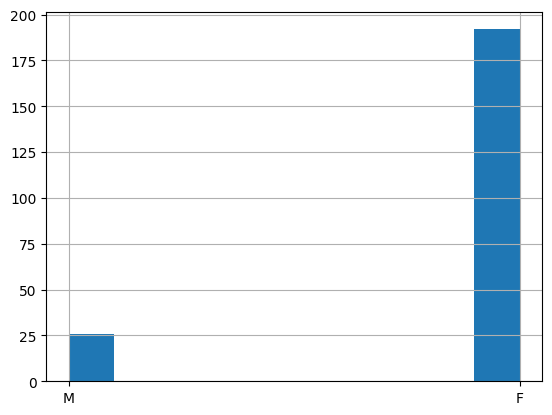

In [362]:
# Graficar Histograma de Sex
cirrhosis_Xtrain['Sex'].hist()

Revisando los datos, se nota una gran diferencia entre hombres y mujeres en la distribución, al tener una mayoria de mujeres significativa, se revisara con negocio si se mantiene o elimina la columna, y si queremos hacer solo predicciones con mujeres, de igual manera habrá que revisar la correlación de esta con el campo, para ver si realmente es significativa, lo cual se vera más adelante.

### Analysis univariado de variables numericas

#### Representación de histogrmas para visualizar las distirbuciones

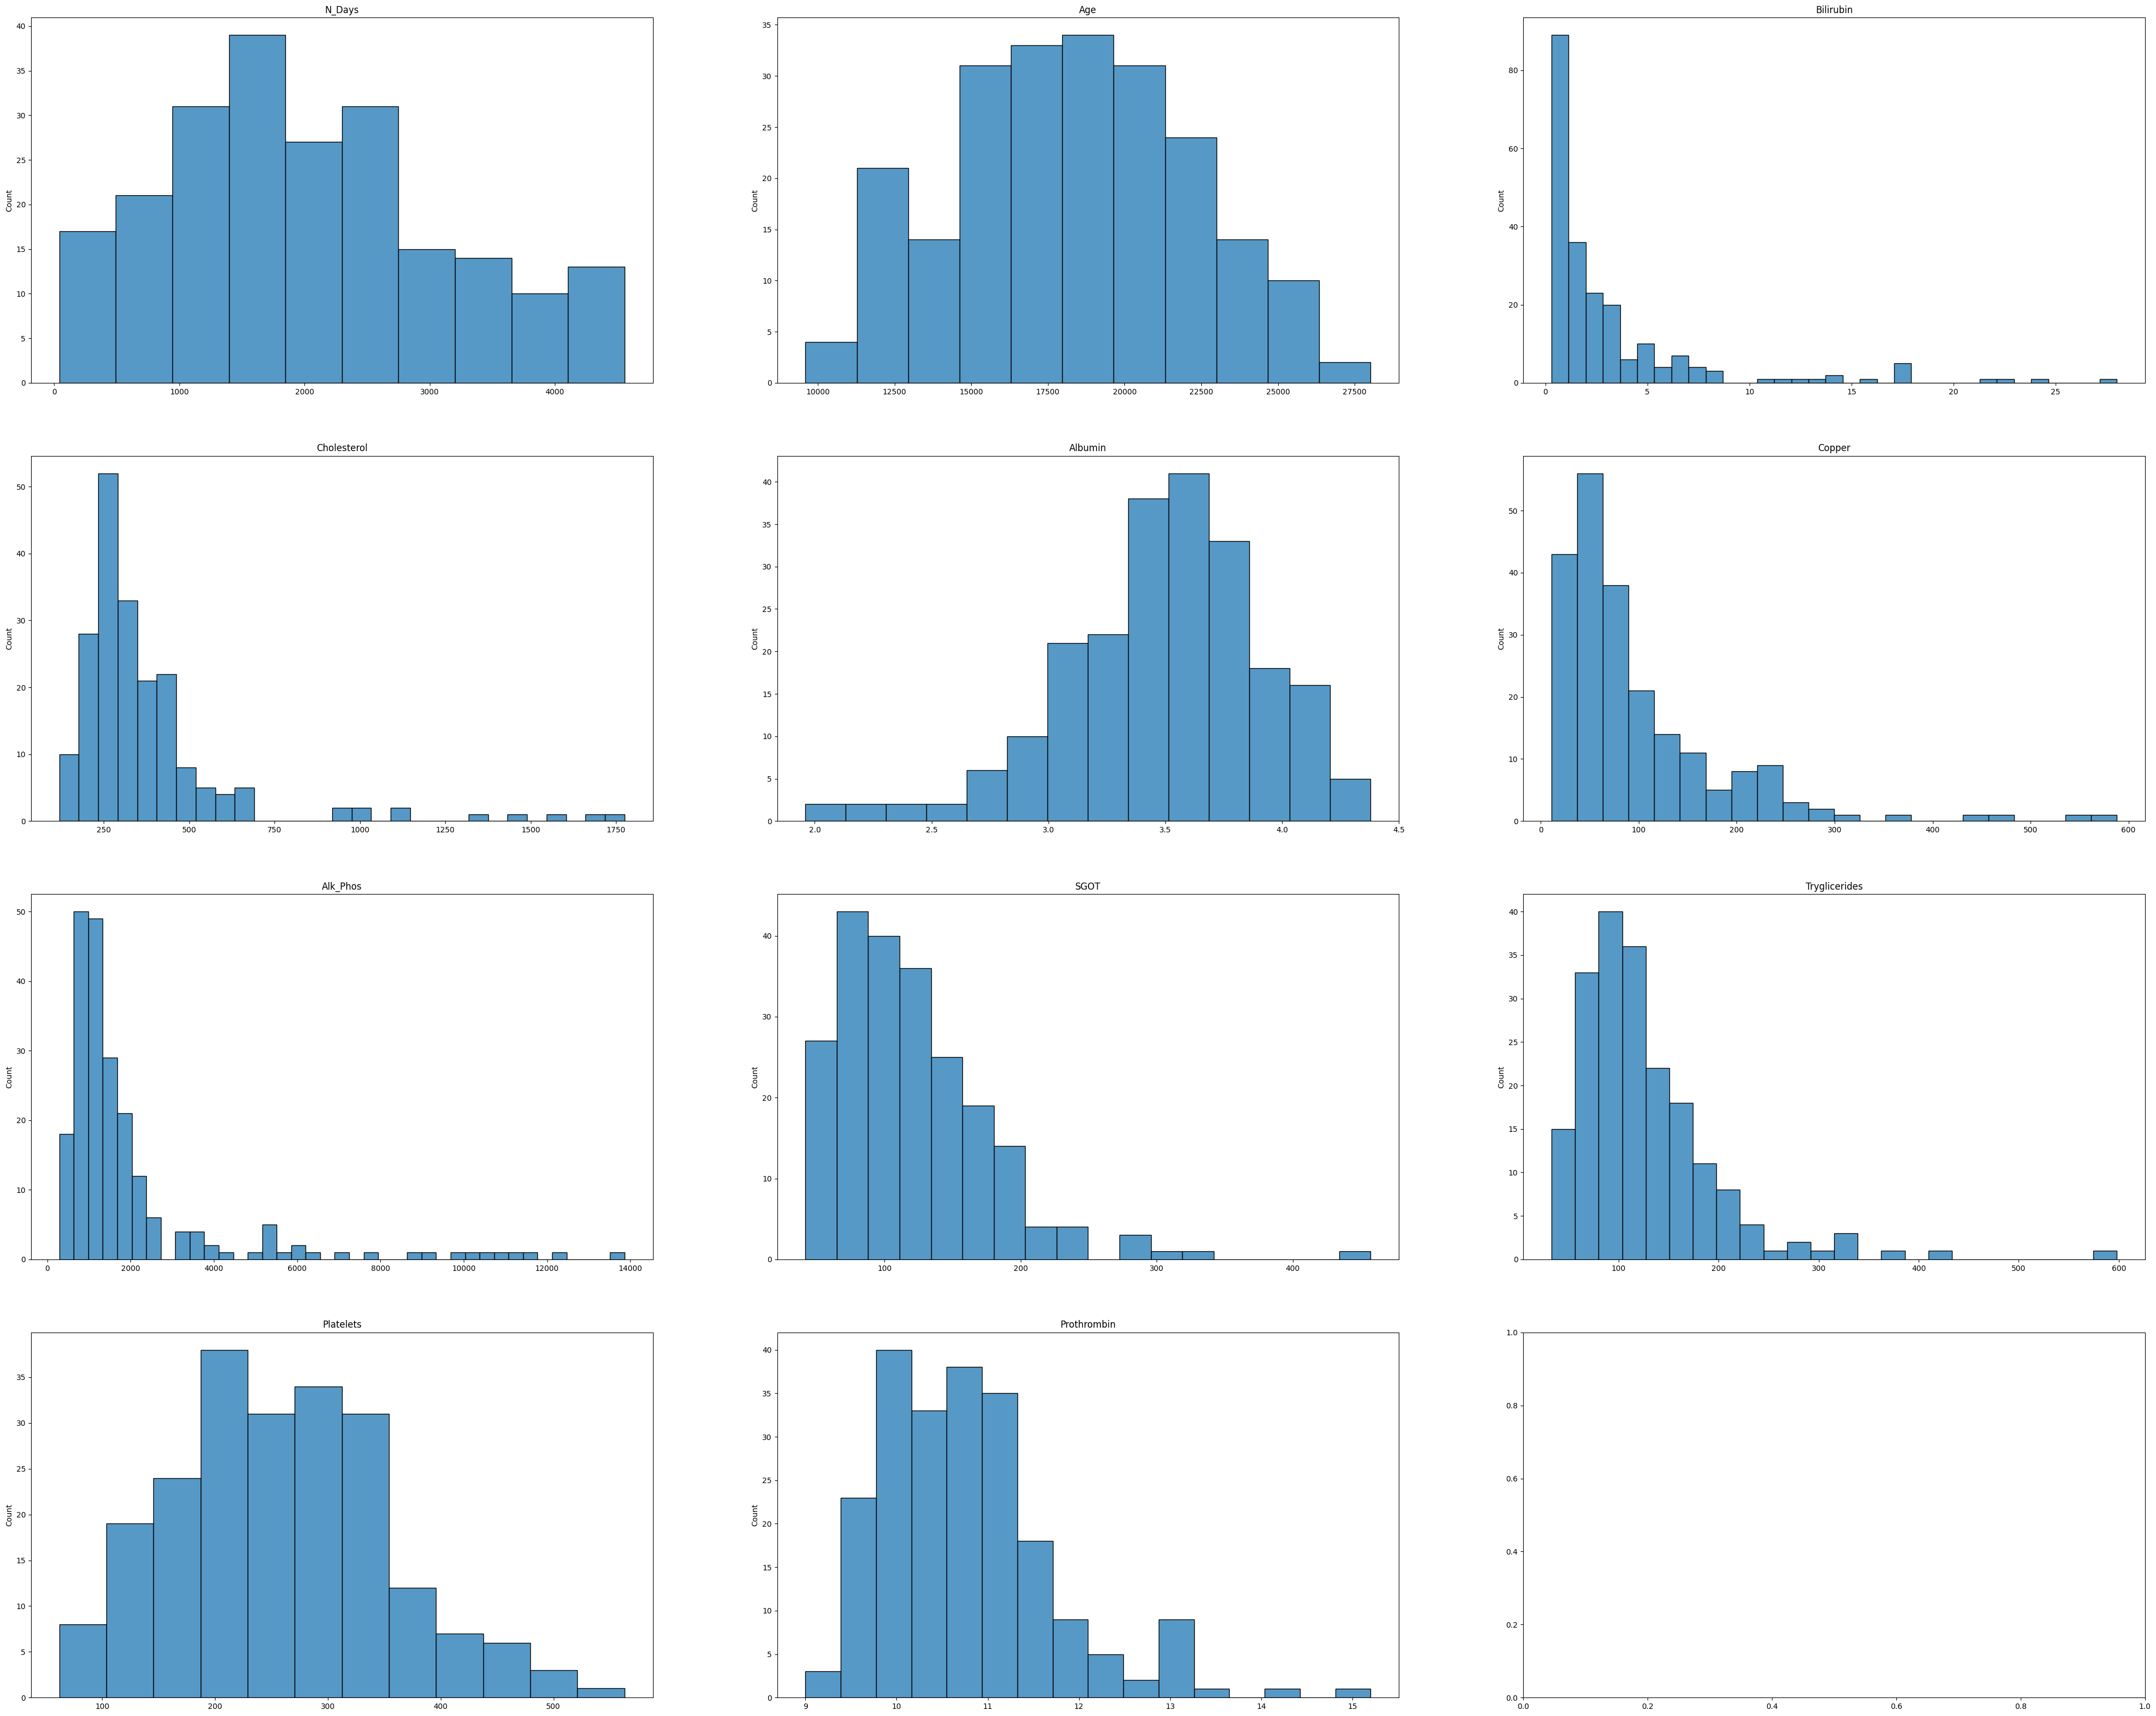

In [364]:
# Se evalúa si las variables númericas requieren alguna transformación (Excluytendo ID, que sabemos que no la necesitamos)
cat_con = cirrhosis_Xtrain.select_dtypes(include="number").columns.tolist()[1:]

fig, axes = plt.subplots(4,3, figsize=(50,40))
axes = axes.ravel()
for col, ax in zip(cirrhosis_Xtrain[cat_con], axes):
  sns.histplot(x=cirrhosis_Xtrain[col], ax=ax)
  ax.set(title=f'{col}', xlabel=None)

Observando los histogramas, podemos ver que hay algunas variables que cuentan con distribuciones no homogeneas, por lo que muy probablemente, exitan outlieres y debamos hacer alguna transformación para estas variables.Algunas de estas variables son Bilirubin, Cholesterol, Copper, Alk_Phos, SGOT, tryglicerides, Prothrombin. Las siguientes transformaciones se aplicaran en la sección de preprocesamiento:    

skew positiva o negativa. A los cuales pertenece "Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothtombin". A estas les aplicare las siguientes transformaciones SimpleInputer, Standard Scaler y Función raíz cuadrada. La función raíz cuadrada es para quitar el skew y el Standard Scaler es para normalizar la distribución y escalar los datos en caso de usar regresión logística.

Al resto de variables les aplicare solamente el imputer y el Standard Scaler para normalizar la distribución.

#### Diagramas de caja de variables numericas

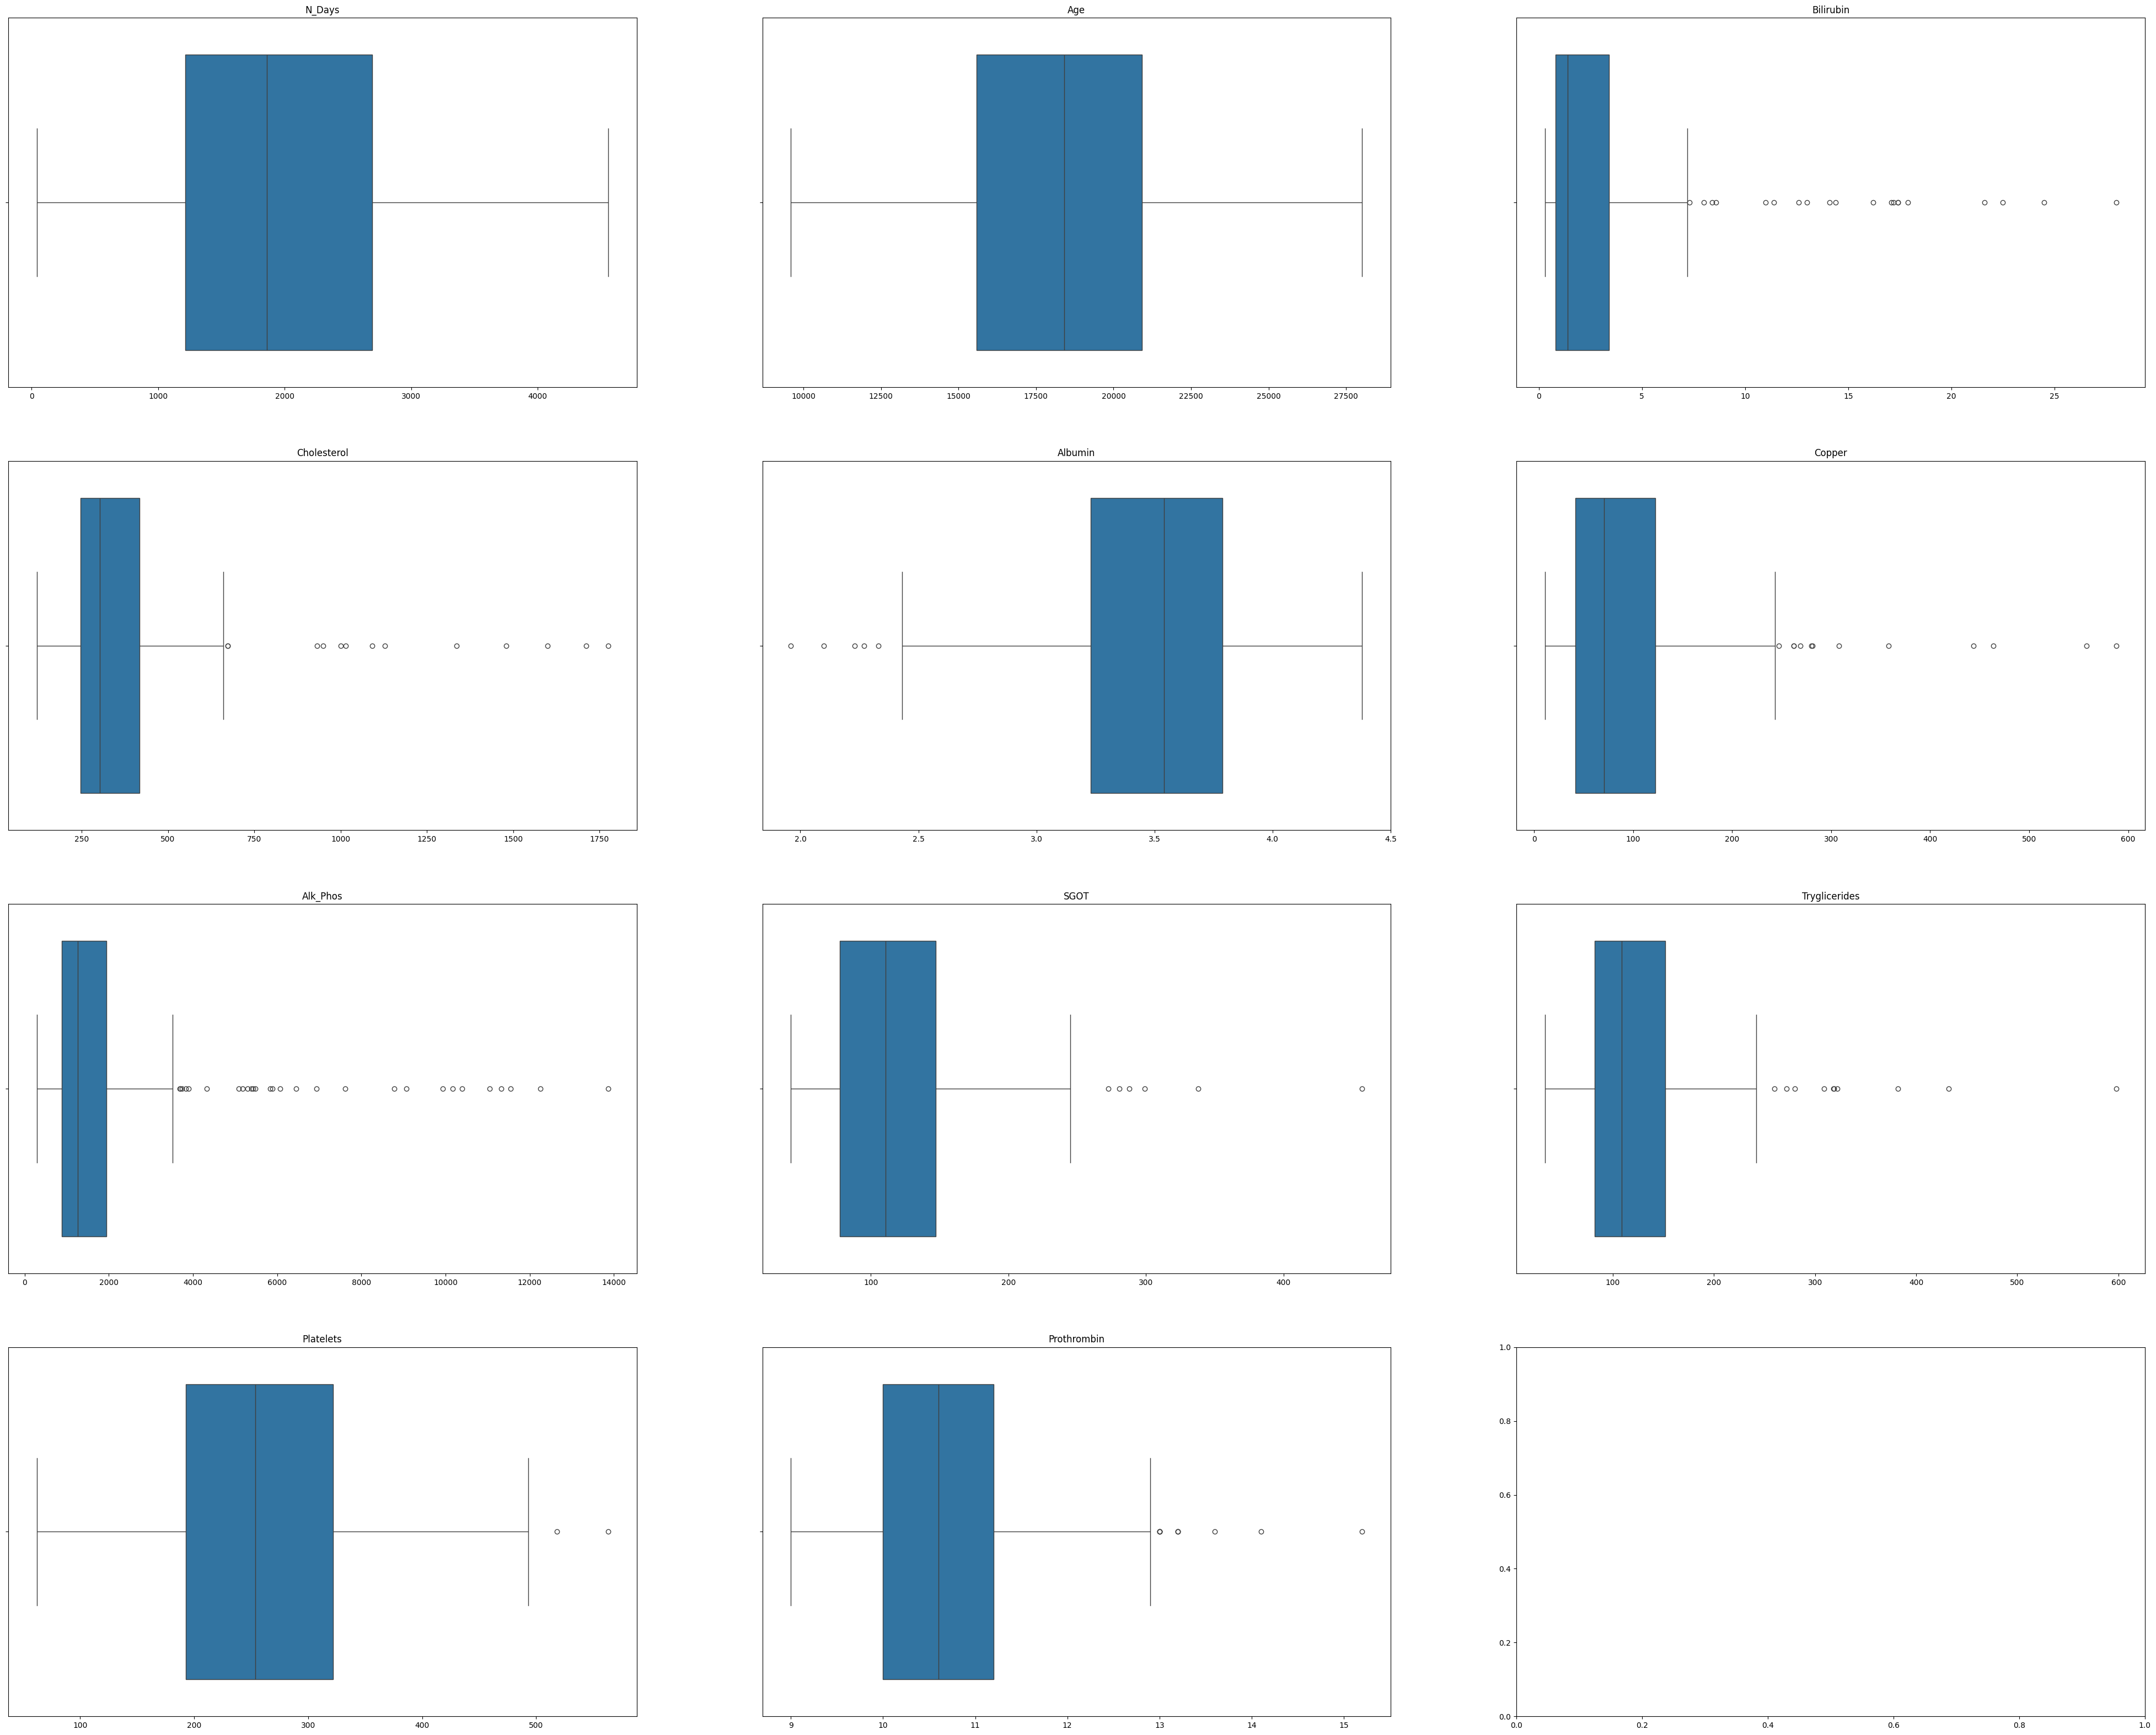

In [366]:
def boxplot(df):

  cat_con = cirrhosis_Xtrain.select_dtypes(include="number").columns.tolist()[1:]

  fig, axes = plt.subplots(4,3, figsize=(50,40))
  axes = axes.ravel()
  for col, ax in zip(cirrhosis_Xtrain[cat_con], axes):
    sns.boxplot(x=cirrhosis_Xtrain[col], ax=ax)
    ax.set(title=f'{col}', xlabel=None)

boxplot(df_cirrhosis)


Notamos que efectivamente las variables mencionadas tienen outliers, por lo que vamos a remover algunos de los outliers encontrados. Pero viendo la tendencias de las curvas, haremos las transformaciones mencionadas para evitar el efecto de los outliers significativamente.

### Analysis univariado de variables categoricas

#### Hacemos el countplot de las variables categoricas

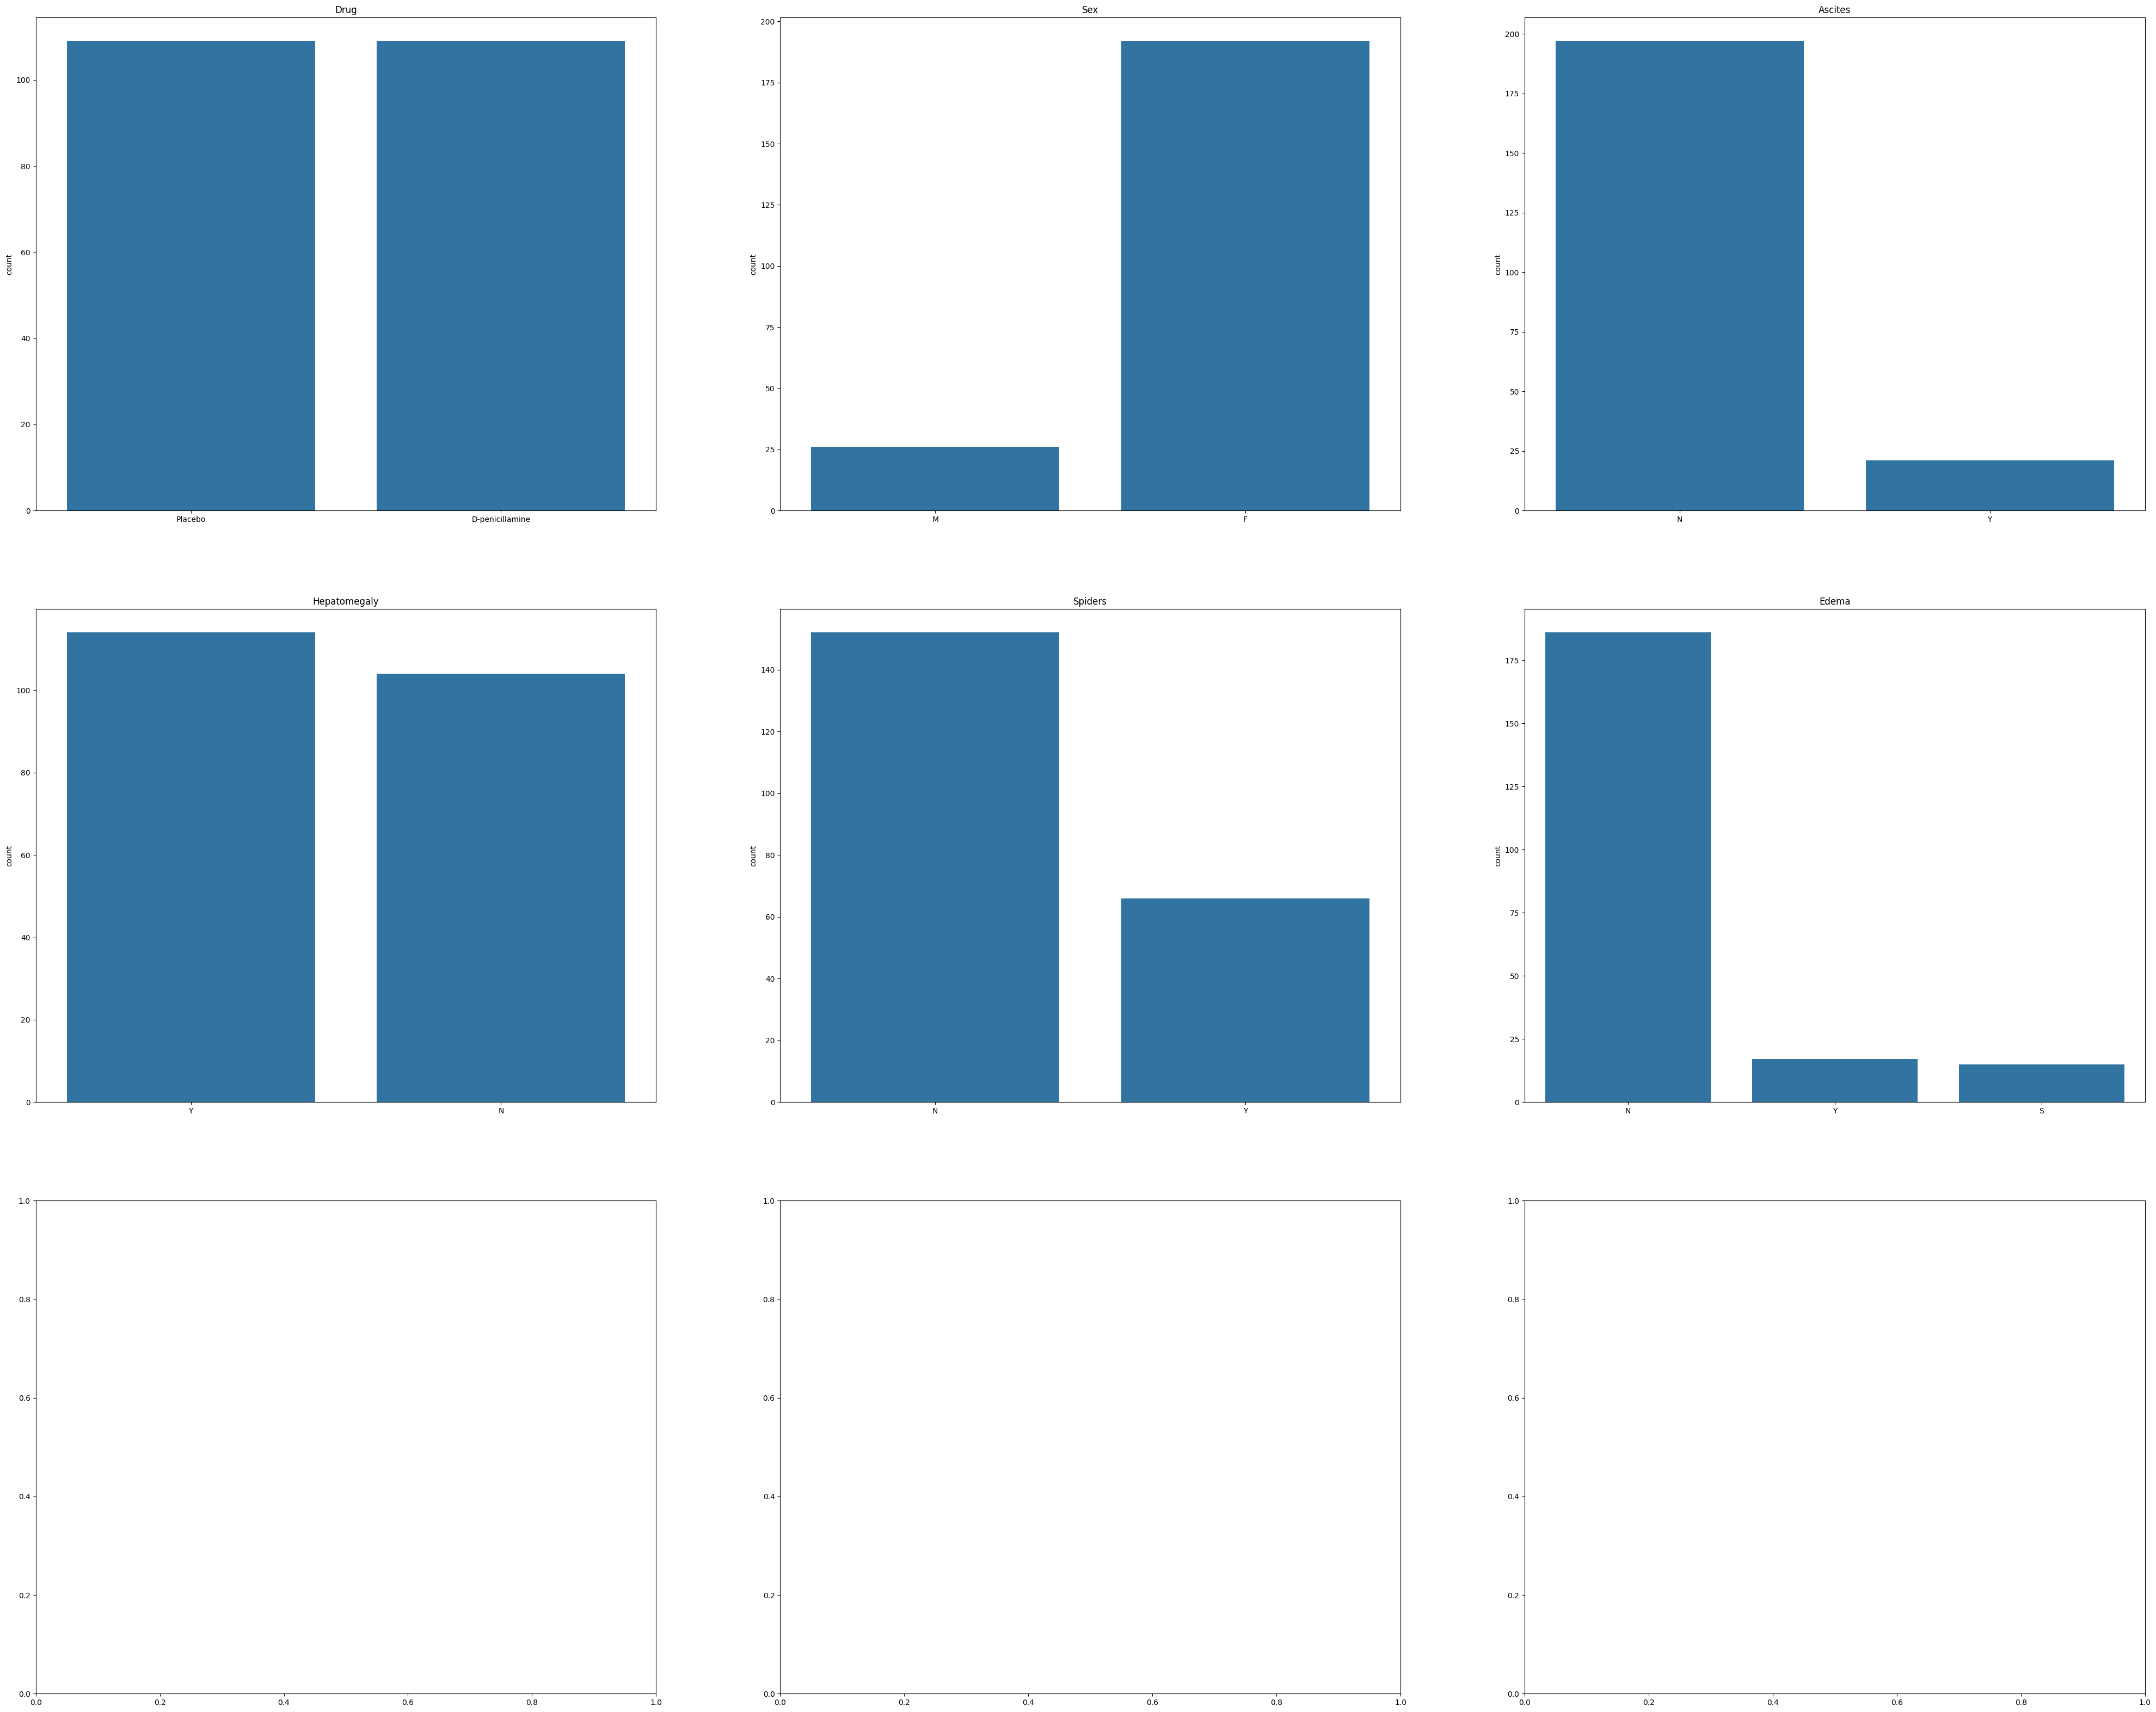

In [367]:
cat_con = cirrhosis_Xtrain.select_dtypes(include="object").columns.tolist()[1:]

fig, axes = plt.subplots(3,3, figsize=(50,40))
axes = axes.ravel()
for col, ax in zip(cirrhosis_Xtrain[cat_con], axes):
  sns.countplot(x=cirrhosis_Xtrain[col], ax=ax)
  ax.set(title=f'{col}', xlabel=None)

Observamos que las variables categoricas, están muy distintas en valores, por lo que valdría la pena verificar cuales si están realmente relacionadas con el valor a predecir. Lo cual veremos en el analisis multivariado de variables no numericas

### Analysis multivariado de variables numericas

#### Realizamos el mapa de correlación de Pearson para ver si existen variables que esten fuertemente relacionadas entre si, para descartarlas en el analisis.

<Axes: >

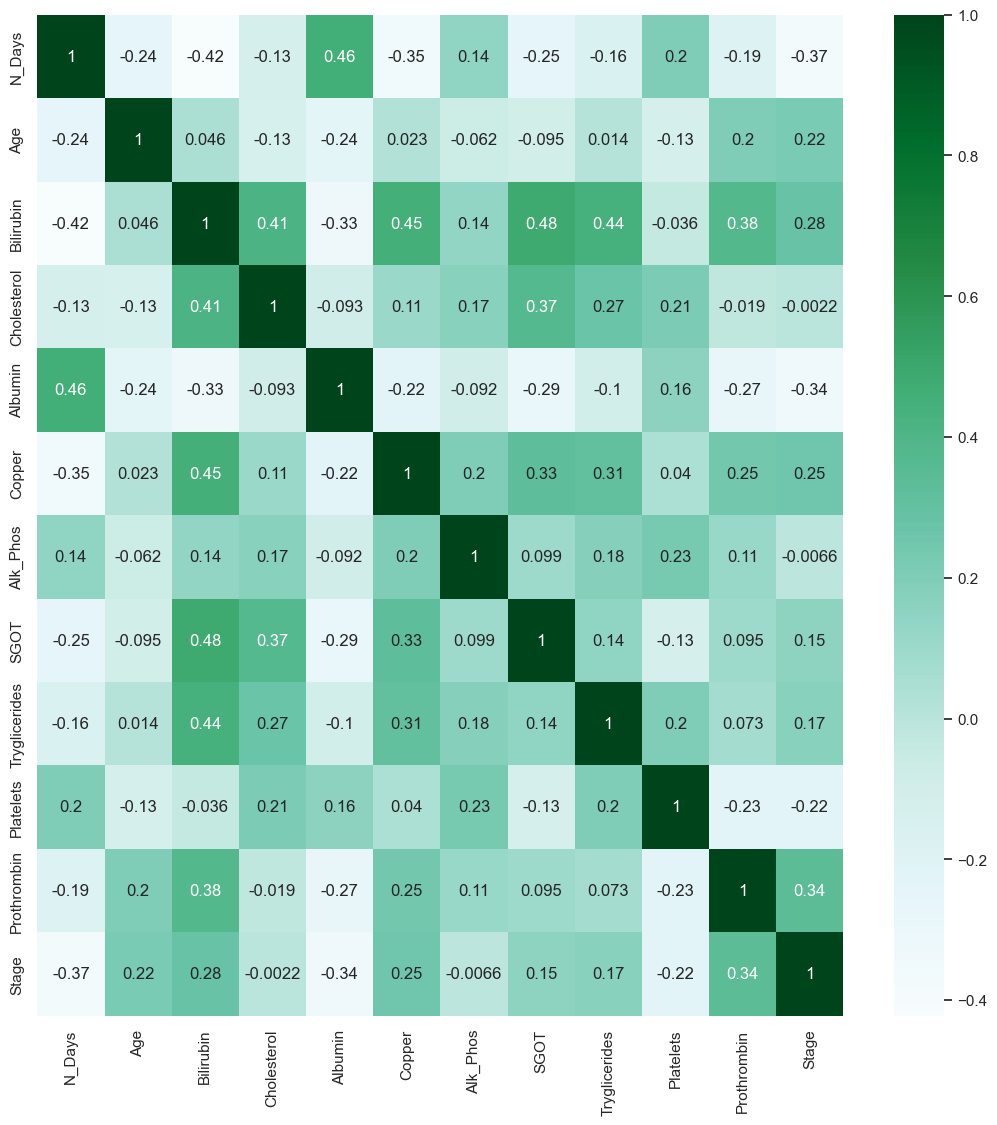

In [373]:
sns.set(rc={'figure.figsize':(13,13)})
cirrhosis_XtrainCorr = cirrhosis_Xtrain.copy().drop('ID',axis=1)
cirrhosis_XtrainCorr["Stage"] = cirrhosis_ytrain
sns.heatmap(cirrhosis_XtrainCorr.corr(numeric_only=True), annot=True,cmap="BuGn")

Observamos que no existe ninguna correlación fuerte negativa o positiva, por lo que decidimos mantener todas las variables en la primera iterración.

### Analysis multivariado de Variables no númericas

#### Realizamos Diagramas de caja para ver como se relacionan las variables con la variable de salida

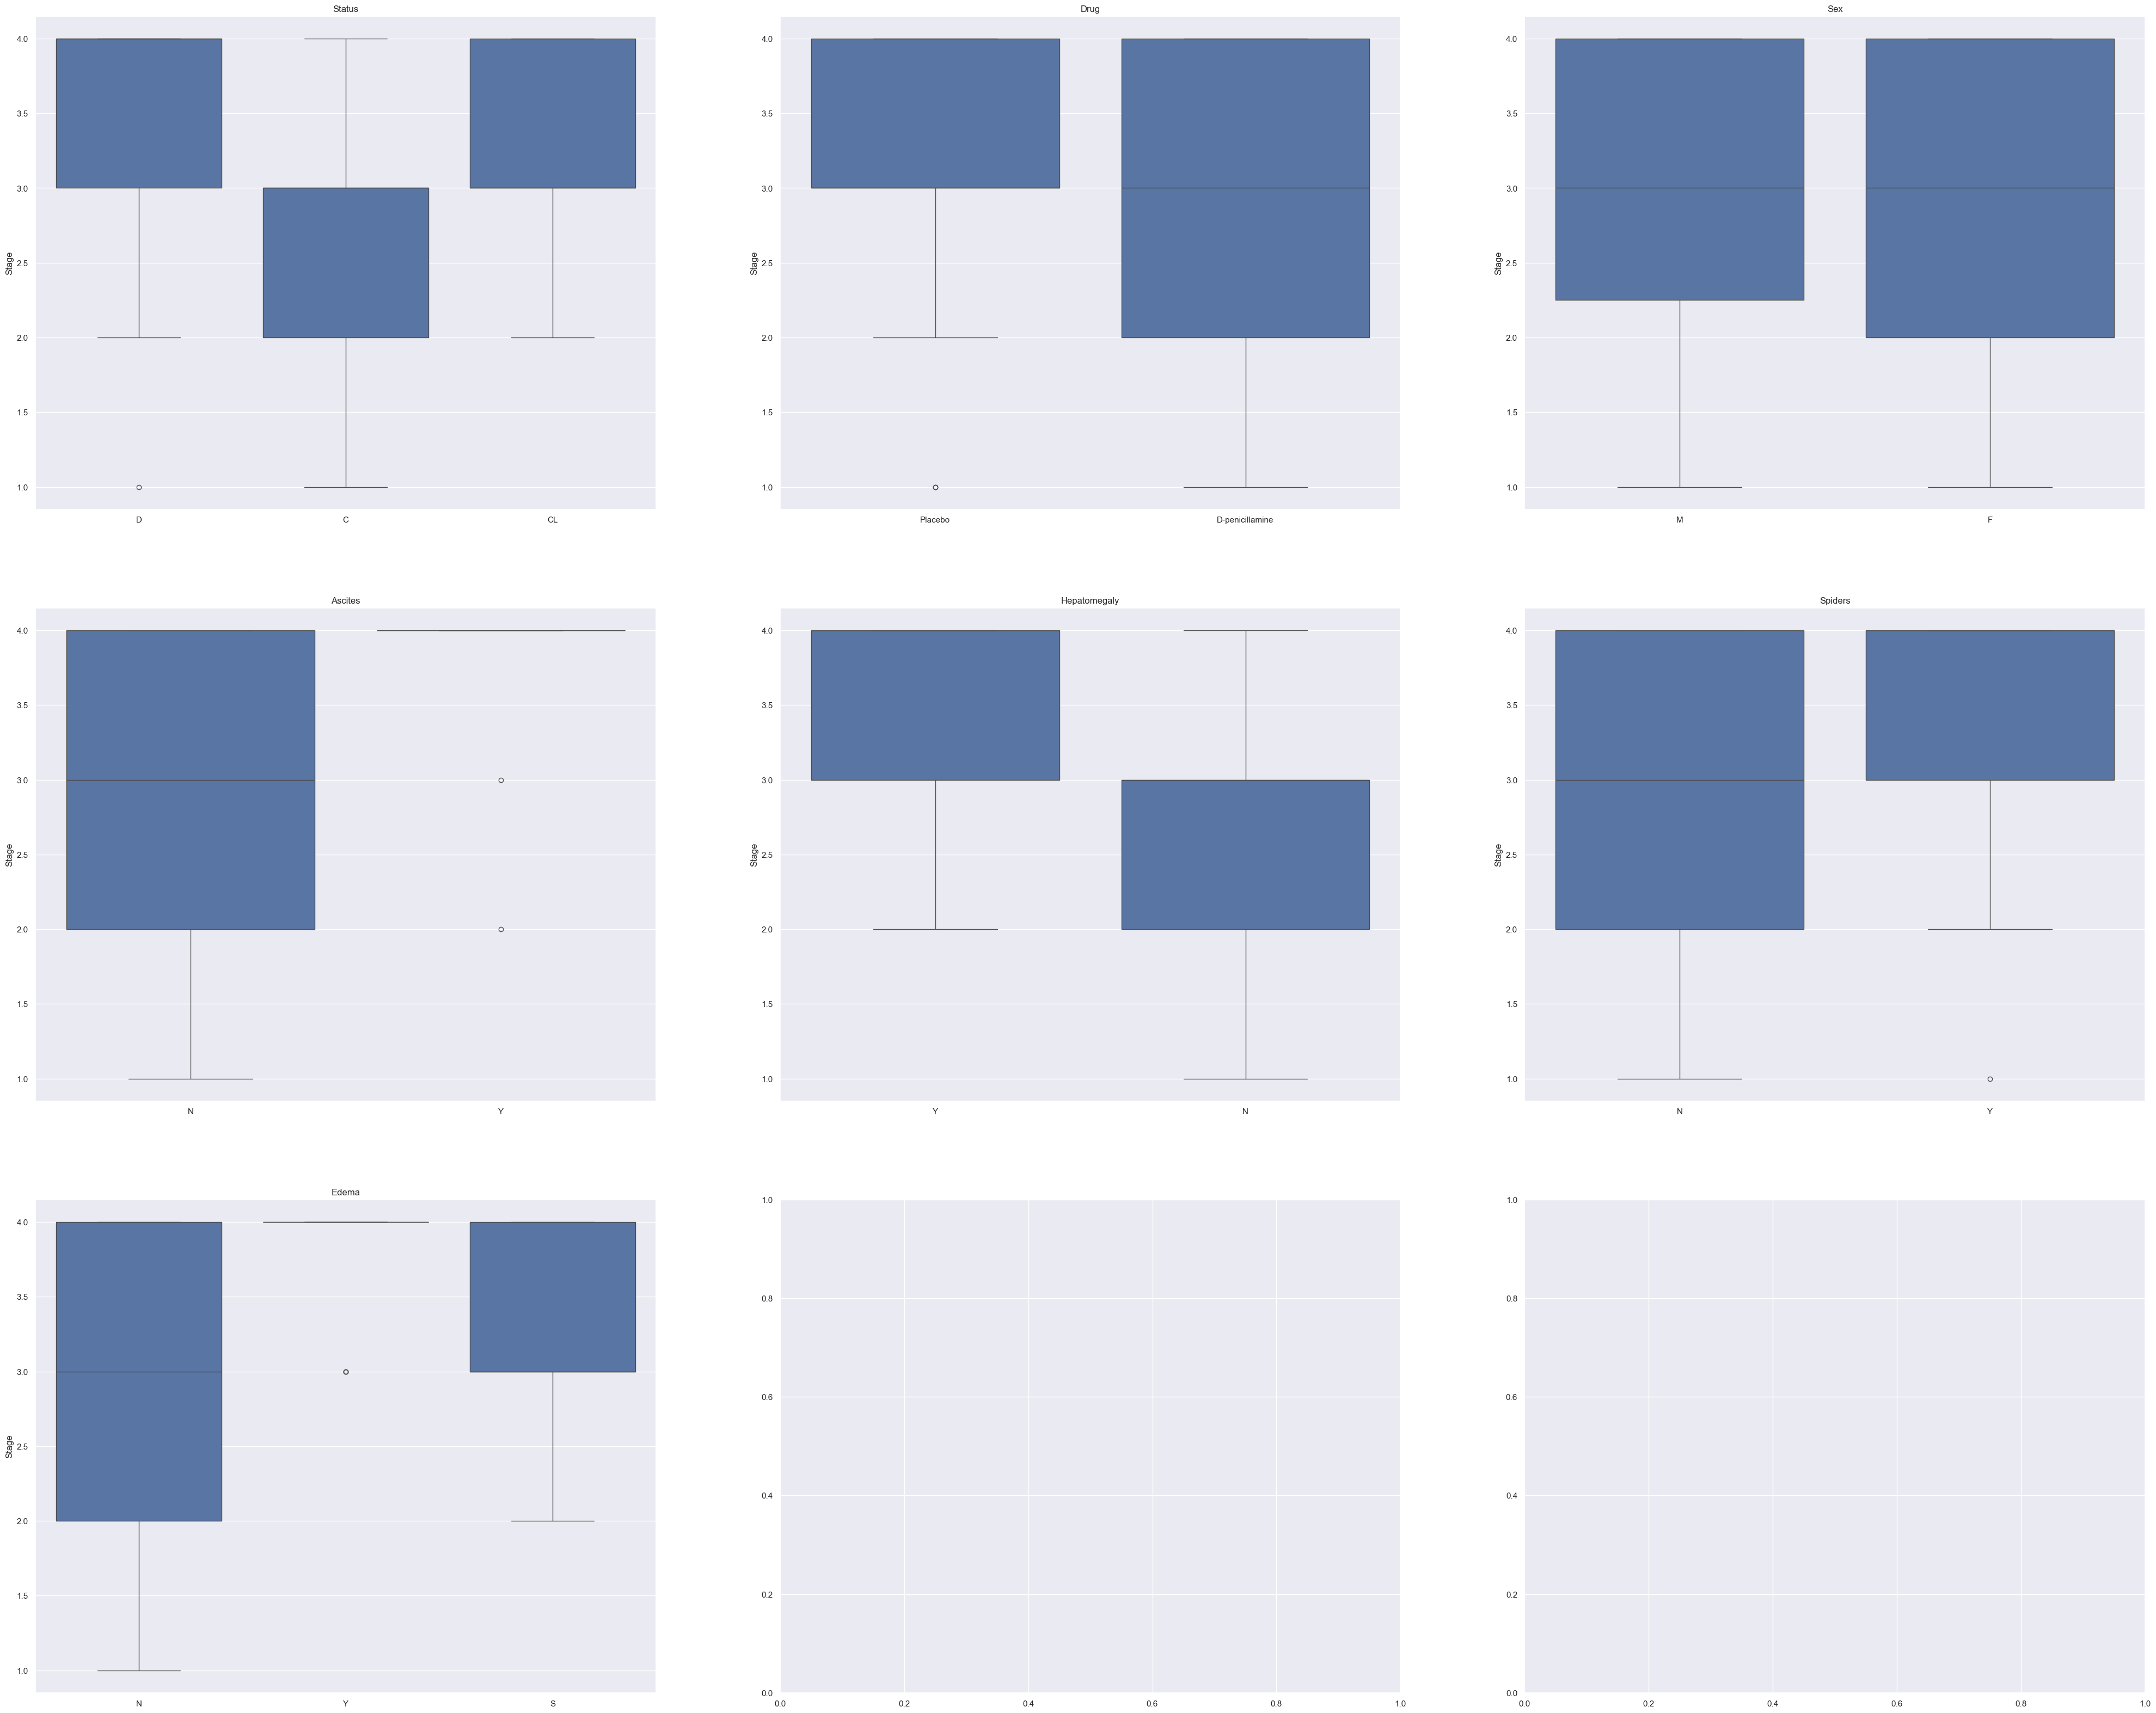

In [376]:
cat_con = cirrhosis_Xtrain.select_dtypes(include="object").columns.tolist()
df_para_graficar = Graf = pd.concat([cirrhosis_Xtrain[cat_con],cirrhosis_ytrain],axis=1)

fig, axes = plt.subplots(3,3, figsize=(50,40))
axes = axes.ravel()
for col, ax in zip(cirrhosis_Xtrain[cat_con], axes):
  sns.boxplot(Graf, x=col,y="Status",ax=ax)
  ax.set(title=f'{col}', xlabel=None)

Podemos observar que la columna sexo no tiene ninguna relevancia con la catgoria stage, por lo que se podria eliminar, ya que no aporta mucha información. Observamos que el resto de las columnas se pueden conservar

# Preprocesamiento

### Definir pasos del pipeline

#### Declarar imputer para remplazar los valores nulos con el promedio

In [377]:
cirrhosis_mean_imputer = SimpleImputer(strategy='mean')


#### Declarar Standard Scaler para Scalar los datos y estandarizar las distribuciones

In [379]:
cirrhosis_standard_scaler = StandardScaler()

#### Declarar Function transformer para ejecutar la función logaritmo y ajustar las distribuciones

In [381]:
def f(self, input_features):
    return input_features

cirrhosis_sqrt_transformer = FunctionTransformer(np.sqrt,feature_names_out=f)

#### Declarar OneHotEncoder para las variables categoricas

In [384]:
cirrhosis_label_encoder = LabelEncoder()

### Definir pipeline de datos

Definiremos el pipeline que aplicara las siguientes tareas:

Columnas Númericas con skew, que son las siguientes ("Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothtombin"):
    1.- Imputar valores con los promedios
    2.- Logaritmo para ajustar skew
    3.- Scaler para scalra y normalizar la distrubyucion

Columnas Numericas sin skew, que son las siguientes ("N_Days", "Age"):
    1.- Imputar valores con los promedios
    2.- Scaler para scalar y normalizar la distribución

Columnas no Numericas, que son las siguientes ("Drug", "Ascites","Hepatomegaly", "Spiders", Edema ):
    1.- OneHotEncoder

Quitaremos las siguientes columnas "ID", "Sex"


In [ ]:
cirrhosis_skew_numerico_columnas = ["Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets",]
cirrhosis_no_skew_numerico_columnas = []
cirrhosis_categoricas_columnas =  []
cirrhosis_skew_numerico_pipeline = []
cirrhosis_no_skew_numerico_pipeline = []
cirrhosis_categoricas_pipeline = []

### Observar el porcentaje de nulos restantes

In [170]:
valores_Nullos_del_df_cirrhosis.calcular_porcentajes_de_valores_nulos()

ID               0.0
N_Days           0.0
Status           0.0
Drug             0.0
Age              0.0
Sex              0.0
Ascites          0.0
Hepatomegaly     0.0
Spiders          0.0
Edema            0.0
Bilirubin        0.0
Cholesterol      0.0
Albumin          0.0
Copper           0.0
Alk_Phos         0.0
SGOT             0.0
Tryglicerides    0.0
Platelets        0.0
Prothrombin      0.0
Stage            0.0
dtype: float64

### Guardar el df sin nulos en ninguna columna

In [171]:
df_cirrhosis = valores_Nullos_del_df_cirrhosis.get_df()
cirrhosis_df_clean_saver.save_to_csv(df_cirrhosis)

 El df se guardo exitosamente como csv en el archivo ./data/cirrhosis_clean.csv


### Eliminar columnas no necesarias

#### Declarar clase para eliminar

In [173]:
class eliminadorDeColumnas:
    def __init__(self,df):
        self.df = df.copy()

    def eliminar_columnas(self,columnas_a_eliminar):
        self.df = self.df.drop(columns=columnas_a_eliminar)
        return self.df
    
    def get_df(self):
        return self.df

#### Eliminar columna ID

In [174]:
# Se eliminan columnas del dataframe que no aportan valor al análisis
eliminador_df_cirrhosis = eliminadorDeColumnas(df_cirrhosis)
df_cirrhosis = eliminador_df_cirrhosis.eliminar_columnas(['ID'])
df_cirrhosis.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


#### Guardar el dataframe csv con los datos limpios para procesarlo con dvc

In [175]:
cirrhosis_df_clean_saver.save_to_csv(df_cirrhosis)

 El df se guardo exitosamente como csv en el archivo ./data/cirrhosis_clean.csv
